In [1]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz


--2024-10-16 18:13:32--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  2.69MB/s    in 37s     

2024-10-16 18:14:09 (2.18 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [2]:
!tar xvzf aclImdb_v1.tar.gz



Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [55]:
import os

def fetch_reviews(path):
  data = []
  #path = 'aclImdb/train/pos/'
  files = [f for f in os.listdir(path)]
  for file in files:
    with open(path+file, "r", encoding='utf8') as f:
      data.append(f.read())

  return data

In [56]:
import pandas as pd

df_train_pos = pd.DataFrame({'review': fetch_reviews('aclImdb/train/pos/'), 'label': 1})
df_train_neg = pd.DataFrame({'review': fetch_reviews('aclImdb/train/neg/'), 'label': 0})

df_test_pos = pd.DataFrame({'review': fetch_reviews('aclImdb/test/pos/'), 'label': 1})
df_test_neg = pd.DataFrame({'review': fetch_reviews('aclImdb/test/neg/'), 'label': 0})

# Merging all df's for data cleaning and preprocessing step.
df = pd.concat([df_train_pos, df_train_neg, df_test_pos, df_test_neg], ignore_index=True)
print("Total reviews in df: ", df.shape)
df.head()


Total reviews in df:  (50000, 2)


,review,label
0,Tressa's vocal performance was Outstanding!! T...,1
1,"Well, when before I saw this film I really was...",1
2,"I remember this movie from when i was 12, it w...",1
3,"This is one of the best reunion specials ever,...",1
4,This made for television version of the legend...,1


In [57]:
print(df.columns)


Index(['review', 'label'], dtype='object')


In [58]:
# No null values in dataset.
df['review'].isnull().sum()

0

In [59]:
print("Total Number of positive reviews in data: ", df[df['label']==1].shape[0])
print("Total Number of negative reviews in data: ", df[df['label']==0].shape[0])

Total Number of positive reviews in data:  25000
Total Number of negative reviews in data:  25000


In [60]:
# sample positive movie review
df[df['label']==1].sample(n=1)['review'].iloc[0]

"This film is great. All the hi-tech machinery and technology is mind-boggling. It is packed with action, humour and not to mention, guys. You will want to see it again and again. Very very funny. Also, it has a very unique plot which is unpredictable. You wouldn't want to miss out on it."

In [61]:
# sample negative review
df[df['label']==0].sample(n=1)['review'].iloc[0]

'This film has an interesting plot, but the acting is quite bad and the script is poor. I was very disappointed. The moral dilemma faced by the main character is an intriguing one, but due to poor writing and casting this potentially winning premise is plundered. 2 of the 4 other people in the theater left after about 45 minutes and the other 2 were laughing at how bad the film was. I stuck it out to the end, but I must admit I played Blackjack on my cell phone to make the last 30 minutes bearable.'

In [62]:
# word_count in reviews
df['word_counts'] = df['review'].apply(lambda x: len(x.split()))

# word_counts.describe()
print (df)

                                                  review  label  word_counts
0      Tressa's vocal performance was Outstanding!! T...      1          161
1      Well, when before I saw this film I really was...      1          137
2      I remember this movie from when i was 12, it w...      1          158
3      This is one of the best reunion specials ever,...      1          122
4      This made for television version of the legend...      1          320
...                                                  ...    ...          ...
49995  Jeff Speakman never really made it beyond the ...      0          161
49996  What a terrible movie! It represents perfectly...      0          172
49997  I only wish there was a grade lower than F to ...      0           97
49998  This movie is a real low budget production, ye...      0          346
49999  "Red Sonja" is flawed, weak and lacking. Even ...      0          319

[50000 rows x 3 columns]


In [63]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
print(df.columns.tolist())  # Display the list of column names


['review', 'label', 'word_counts']


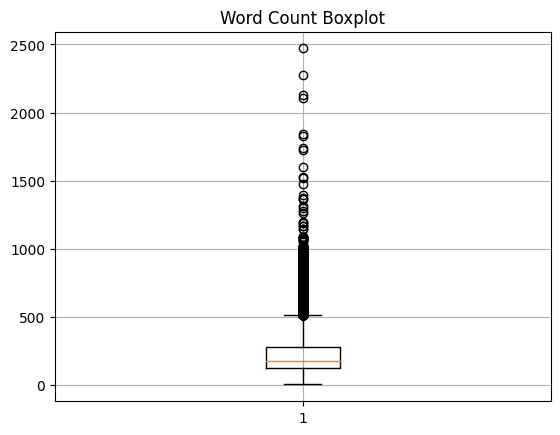

In [66]:
plt.title('Word Count Boxplot')
plt.boxplot(df['word_counts'].values)
plt.grid(True)
plt.show()

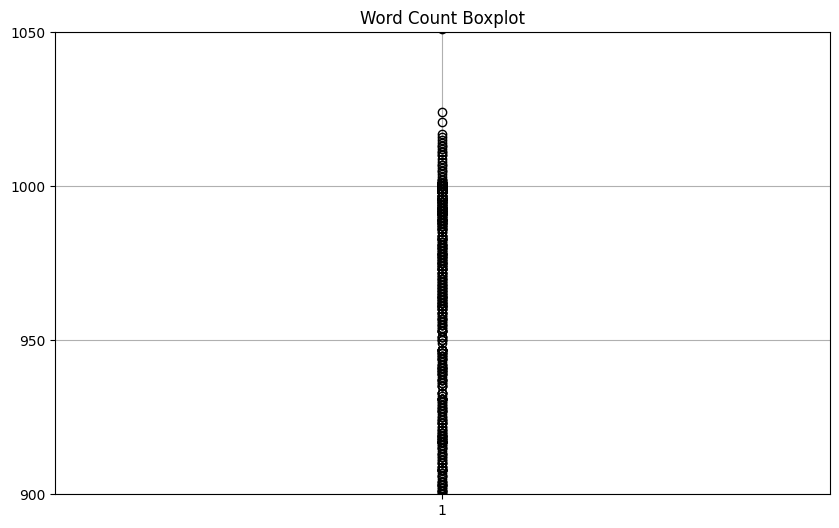

In [129]:

plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
plt.title('Word Count Boxplot')
plt.boxplot(df['word_counts'].values)

# Set the y-axis limits to focus on the range between 500 and 1000
plt.ylim(900, 1050)

# Set the y-ticks to have more spacing and better readability
plt.yticks(range(900, 1051, 50))  # Change 50 to adjust the spacing between ticks

plt.grid(True)
plt.show()



> Observations:  Most of the reviews have words 510 - 1010



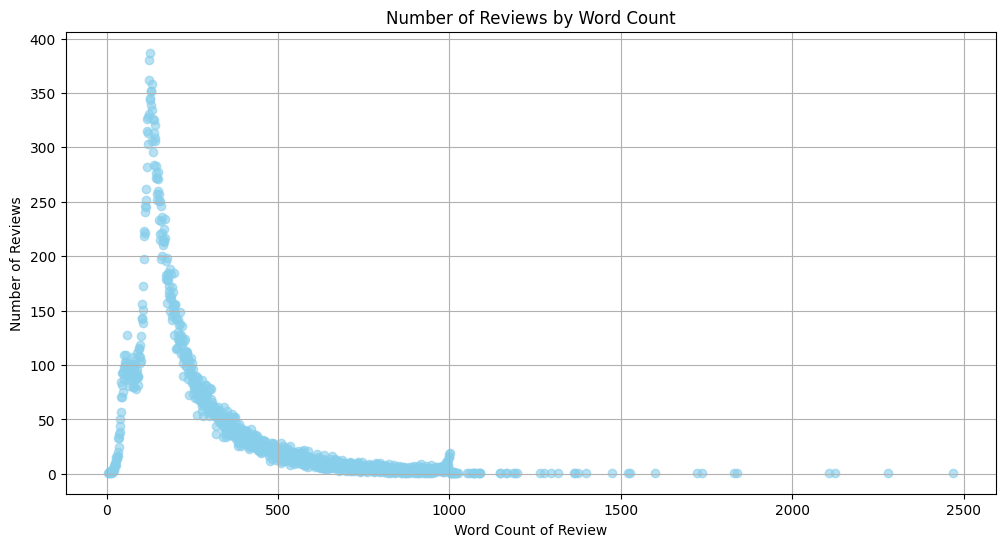

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.DataFrame({'review': ['Your review 1', 'Your review 2', 'Your review 3', ...]})

# Calculate the number of words in each review
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# Count the frequency of each word count
length_counts = df['review_length'].value_counts().sort_index()

# Create a scatter plot to show the number of reviews at each word length
plt.figure(figsize=(12, 6))
plt.scatter(length_counts.index, length_counts.values, alpha=0.6, color='skyblue')
plt.title('Number of Reviews by Word Count')
plt.xlabel('Word Count of Review')
plt.ylabel('Number of Reviews')
plt.grid(True)

plt.show()


In [67]:
import nltk

# Download the stopwords dataset
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
print(df.columns)


Index(['review', 'label', 'word_counts'], dtype='object')


DATA PROCESSING


In [112]:
import re
# import nltk
# nltk.download('punkt') # At first you have to download these nltk packages.
# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english') # defining stop_words
stop_words.remove('not') # removing not from the stop_words list as it contains value in negative movies
lemmatizer = WordNetLemmatizer()

def data_preprocessing(review):

  # data cleaning
  review = re.sub(re.compile('<.*?>'), '', review) #removing html tags
  review =  re.sub('[^A-Za-z0-9]+', ' ', review) #taking only words

  # lowercase
  review = review.lower()

  # tokenization
  tokens = nltk.word_tokenize(review) # converts review to tokens

  # stop_words removal
  review = [word for word in tokens if word not in stop_words] #removing stop words

  # lemmatization
  review = [lemmatizer.lemmatize(word) for word in review]

  # join words in preprocessed review
  review = ' '.join(review)

  return review

In [113]:
# Retrieve the original review and the processed review for the specified index
index = 33553
original_review = df.loc[index, 'review']  # Original review
processed_review = df.loc[index, 'preprocessed_review']  # Processed review

# Print the original and processed reviews
print("Original Review:")
print(original_review)
print("\nProcessed Review:")
print(processed_review)

Original Review:
I went to see this movie not expecting much, but was pleasantly surprised by the teaming of Robert De Niro and Eddie Murphy. It was a fast paced movie and the hour and a half went by fast. This one certainly won't win any Academy Awards but it was a change of pace for Mr. De Niro. He is good in comedy. Overall I enjoyed it.

Processed Review:
went see movie not expecting much pleasantly surprised teaming robert de niro eddie murphy fast paced movie hour half went fast one certainly win academy award change pace mr de niro good comedy overall enjoyed


In [70]:
import nltk

# Download the necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [152]:
df['preprocessed_review'] = df['review'].apply(lambda review: data_preprocessing(review))
df.head()

,review,label,word_counts,preprocessed_review,review_length
0,Tressa's vocal performance was Outstanding!! T...,1,161,tressa vocal performance outstanding tressa pl...,161
1,"Well, when before I saw this film I really was...",1,137,well saw film really sure whether would cup te...,137
2,"I remember this movie from when i was 12, it w...",1,158,remember movie 12 amazing remember day not lik...,158
3,"This is one of the best reunion specials ever,...",1,122,one best reunion special ever adam west burt w...,122
4,This made for television version of the legend...,1,320,made television version legendary stand hopele...,320


Positive Reviews Wordcloud


In [73]:
print(df.columns)


Index(['review', 'label', 'word_counts', 'preprocessed_review'], dtype='object')


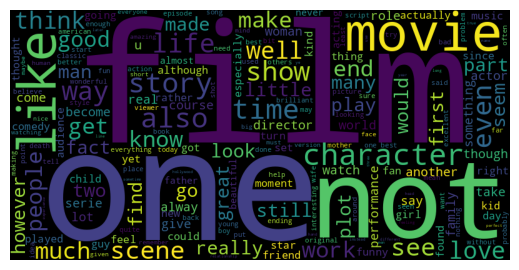

In [165]:
from wordcloud import WordCloud

words_list = df[df['label']==1]['preprocessed_review'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=800, height = 400,
                  stopwords=stop_words).generate(pos_words)

plt.figure(figsize=(5, 5), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

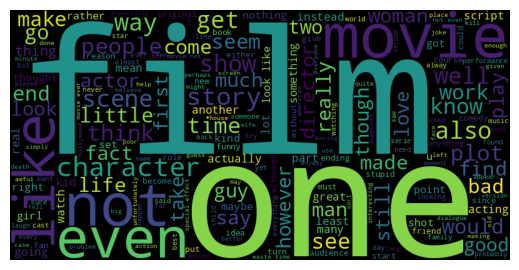

In [166]:
words_list = df[df['label']==0]['preprocessed_review'].unique().tolist()
neg_words = " ".join(words_list)

neg_wordcloud =  WordCloud(
                  width=800, height = 400,
                  stopwords=stop_words).generate(neg_words)

plt.figure(figsize=(5, 5), facecolor = None)
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Splitting data (80-20) : Train | Test


In [76]:
from sklearn.model_selection import train_test_split

data = df.copy()
y = data['label'].values
data.drop(['label'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, stratify=y)

print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

Train data: (40000, 3) (40000,)
Test data: (10000, 3) (10000,)


Vectorizing Text Data - tfidf


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)

X_train_review_tfidf = vectorizer.fit_transform(X_train['preprocessed_review'])
X_test_review_tfidf = vectorizer.transform(X_test['preprocessed_review'])

print('X_train_review_tfidf shape: ', X_train_review_tfidf.shape)
print('X_test_review_tfidf shape: ', X_test_review_tfidf.shape)

X_train_review_tfidf shape:  (40000, 20760)
X_test_review_tfidf shape:  (10000, 20760)


Building LR Model


In [78]:
import warnings
warnings.filterwarnings('ignore')

In [80]:
#Different solver
from sklearn.linear_model import LogisticRegression

# Use 'liblinear' or 'saga' solver with L1 penalty
clf = LogisticRegression(penalty='l1', solver='liblinear')  # or 'saga'
clf.fit(X_train_review_tfidf, y_train)


LogisticRegression(penalty='l1', solver='liblinear')

In [81]:
# choosing penalty
from sklearn.linear_model import LogisticRegression

# Use 'lbfgs' solver with L2 penalty
clf = LogisticRegression(penalty='l2', solver='lbfgs')  # L2 is the default
clf.fit(X_train_review_tfidf, y_train)


LogisticRegression()

In [86]:


# Creating the Logistic Regression model with L1 penalty and liblinear solver
clf = LogisticRegression(penalty='l1', solver='liblinear')

# Fitting the model
clf.fit(X_train_review_tfidf, y_train)

# Predicting the results
y_pred = clf.predict(X_test_review_tfidf)

# (Optional) Evaluate the model performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [90]:
from sklearn.metrics import precision_recall_curve, classification_report


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



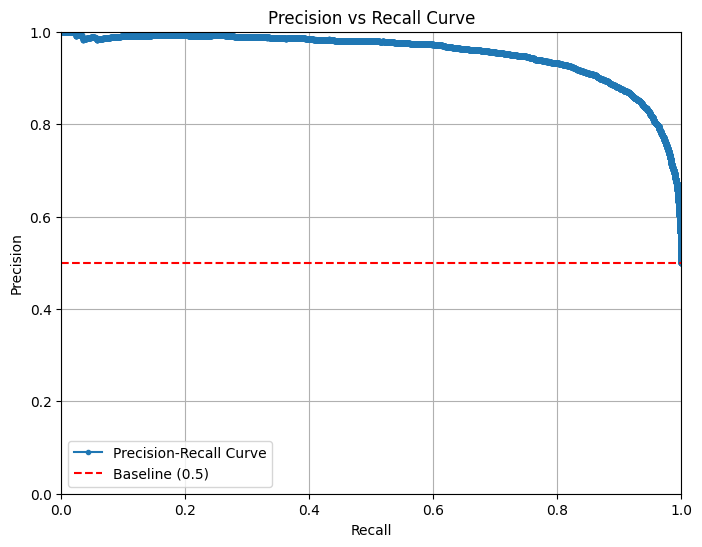

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, classification_report

# Creating the Logistic Regression model with L1 penalty and liblinear solver
clf = LogisticRegression(penalty='l1', solver='liblinear')

# Fitting the model
clf.fit(X_train_review_tfidf, y_train)

# Predicting the results
y_pred = clf.predict(X_test_review_tfidf)

# Calculate predicted probabilities for the positive class
y_scores = clf.predict_proba(X_test_review_tfidf)[:, 1]  # Get probabilities for the positive class

# Evaluate the model performance
print(classification_report(y_test, y_pred))

# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plotting Precision vs. Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.title('Precision vs Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid()
plt.axhline(y=0.5, color='r', linestyle='--', label='Baseline (0.5)')
plt.legend()
plt.show()


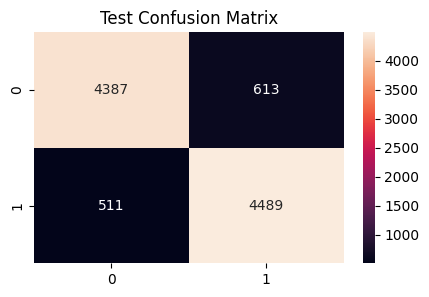

In [83]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

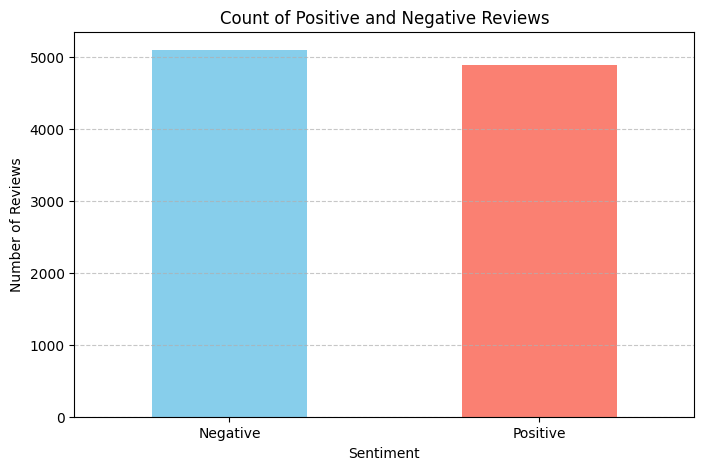

In [160]:
# Counting the occurrences of each label
label_counts = pd.Series(y_pred).value_counts()

# Plotting the results
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Count of Positive and Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [158]:
# import pandas as pd
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split

# # Assuming df is your DataFrame containing 'review' and 'label' columns
# X = df['preprocessed_review']  # Replace with your preprocessed reviews
# y = df['label']  # Replace with your target labels (e.g., positive or negative)

# # Splitting the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Vectorizing the text data
# vectorizer = TfidfVectorizer()
# X_train_tfidf = vectorizer.fit_transform(X_train)
# X_test_tfidf = vectorizer.transform(X_test)

# # Creating and fitting the Logistic Regression model
# clf = LogisticRegression(penalty='l1', solver='liblinear')
# clf.fit(X_train_tfidf, y_train)

# # Getting probability scores for the test set
# probability_scores = clf.predict_proba(X_test_tfidf)[:, 1]  # Get the scores for the positive class (1)

# Creating sentiment scores (you can use the probabilities directly)
# You might want to scale it to a different range or simply use as is
sentiment_scores = probability_scores

# Adding sentiment scores to the DataFrame
df_test = pd.DataFrame({
    'review': X_test,
    'sentiment_score': sentiment_scores
})

# Display the DataFrame with sentiment scores
print(df_test.head(10))


                                                  review  sentiment_score
33553  went see movie not expecting much pleasantly s...         0.953859
9427   1983 bbc production jane eyre starring zelah c...         0.500751
199    saw movie assignment management class mainly c...         0.934355
12447  first saw title already deducing theme film cl...         0.704086
39489  movie made upset think cat hat im thinking cat...         0.416683
42724  starting watching run old columbo movie though...         0.059303
10822  19 month old got really tired watching care be...         0.445426
49498  ewww disney sequel rubbish would thought actua...         0.004046
4144   waiting woman ward large lying hospital joy so...         0.879505
36958  first three stooge short shemp saw one favorit...         0.570346


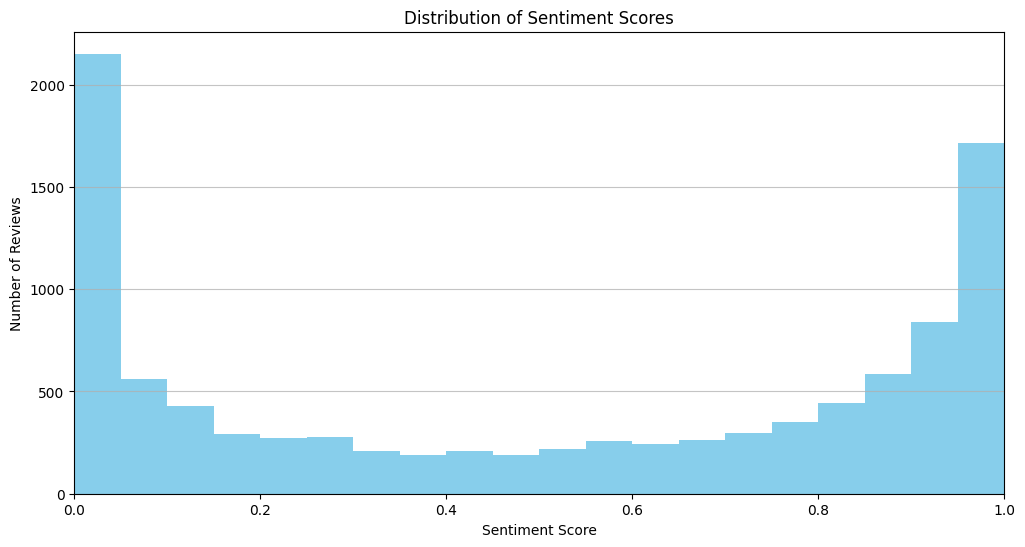

In [168]:

# Plotting the distribution of sentiment scores
plt.figure(figsize=(12, 6))
plt.hist(df_test['sentiment_score'], bins=20, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.xlim(0, 1)  # Assuming sentiment scores range from 0 to 1
plt.grid(axis='y', alpha=0.75)

plt.show()


In [109]:
original_review = df.loc[33553]  # This retrieves the original row with index 33553
print(original_review)


review                 I went to see this movie not expecting much, b...
label                                                                  1
word_counts                                                           66
preprocessed_review    went see movie not expecting much pleasantly s...
Name: 33553, dtype: object


In [110]:
# Retrieve the original review and the processed review for the specified index
index = 33553
original_review = df.loc[index, 'review']  # Original review
processed_review = df.loc[index, 'preprocessed_review']  # Processed review

# Print the original and processed reviews
print("Original Review:")
print(original_review)
print("\nProcessed Review:")
print(processed_review)


Original Review:
I went to see this movie not expecting much, but was pleasantly surprised by the teaming of Robert De Niro and Eddie Murphy. It was a fast paced movie and the hour and a half went by fast. This one certainly won't win any Academy Awards but it was a change of pace for Mr. De Niro. He is good in comedy. Overall I enjoyed it.

Processed Review:
went see movie not expecting much pleasantly surprised teaming robert de niro eddie murphy fast paced movie hour half went fast one certainly win academy award change pace mr de niro good comedy overall enjoyed


In [93]:
# # Get predicted probabilities for the test dataset
# predicted_probabilities = clf.predict_proba(X_test_review_tfidf)

# # Display the predicted probabilities
# # The output will be an array of shape (n_samples, n_classes)
# # For binary classification, the second column represents the probability of the positive class (1)
# positive_class_probabilities = predicted_probabilities[:, 1]

# # Optionally, convert to a DataFrame for better visualization
# import pandas as pd

# # Create a DataFrame with the probabilities
# probability_df = pd.DataFrame({
#     'Predicted Probability (Positive Class)': positive_class_probabilities
# })

# # Display the first few rows
# print(probability_df.head())


   Predicted Probability (Positive Class)
0                                0.163901
1                                0.811022
2                                0.986241
3                                0.873957
4                                0.968666


              feature  coefficient  importance
20547           worst   -20.716725   20.716725
20158           waste   -17.482423   17.482423
1504            awful   -15.230301   15.230301
6589        excellent    13.021933   13.021933
5324   disappointment   -11.924242   11.924242
5838             dull   -11.858748   11.858748
18508        terrible   -11.495990   11.495990
10551            lame   -10.719159   10.719159
6820            fails   -10.659664   10.659664
1561              bad   -10.592283   10.592283
2321           boring   -10.534628   10.534628
829           amazing    10.462769   10.462769
14041          poorly   -10.345828   10.345828
10632       laughable   -10.282295   10.282295
15111      refreshing    10.235054   10.235054
5322    disappointing   -10.059330   10.059330
14038            poor   -10.014897   10.014897
8156            great     9.986053    9.986053
13598         perfect     9.509391    9.509391
19459         unfunny    -9.379791    9.379791


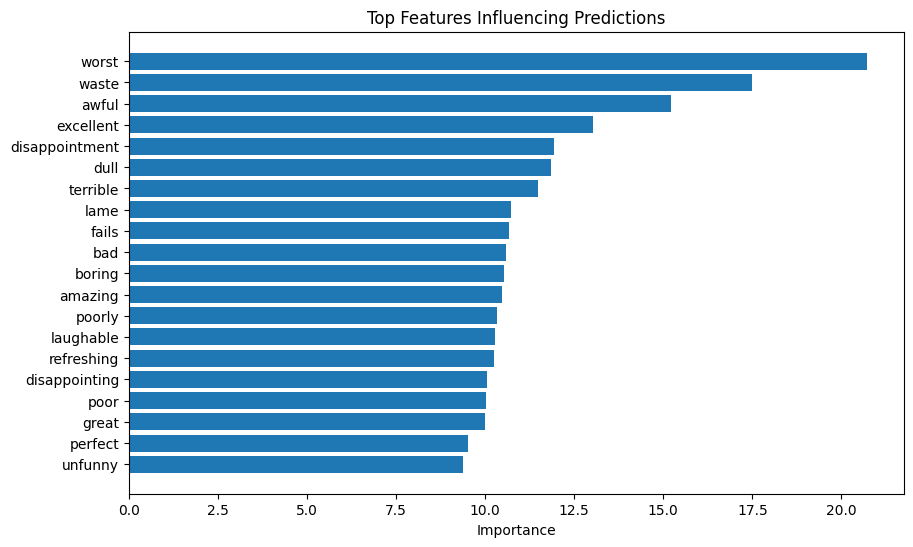

In [95]:

# Which words contribute most to model predictions (Using Coefficients)
# Assuming your model is trained and X_train_review_tfidf is your feature matrix
# Get the feature names (words)
feature_names = np.array(vectorizer.get_feature_names_out())

# Get the model coefficients
coefficients = clf.coef_[0]

# Create a DataFrame to hold feature names and their corresponding coefficients
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients
})

# Sort the features by absolute value of coefficients
feature_importance['importance'] = np.abs(feature_importance['coefficient'])
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# Display the top N features
top_n = 20  # Number of top features to display
print(feature_importance.head(top_n))

# Optionally, visualize the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'][:top_n], feature_importance['importance'][:top_n])
plt.xlabel('Importance')
plt.title('Top Features Influencing Predictions')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()


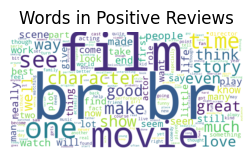

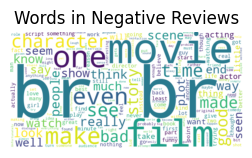

In [105]:
#
from wordcloud import WordCloud

# Create a word cloud for positive predictions
positive_reviews = ' '.join(df[df['label'] == 1]['review'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(3, 3))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Words in Positive Reviews')
plt.show()

# Create a word cloud for negative predictions
negative_reviews = ' '.join(df[df['label'] == 0]['review'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

plt.figure(figsize=(3, 3))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Words in Negative Reviews')
plt.show()


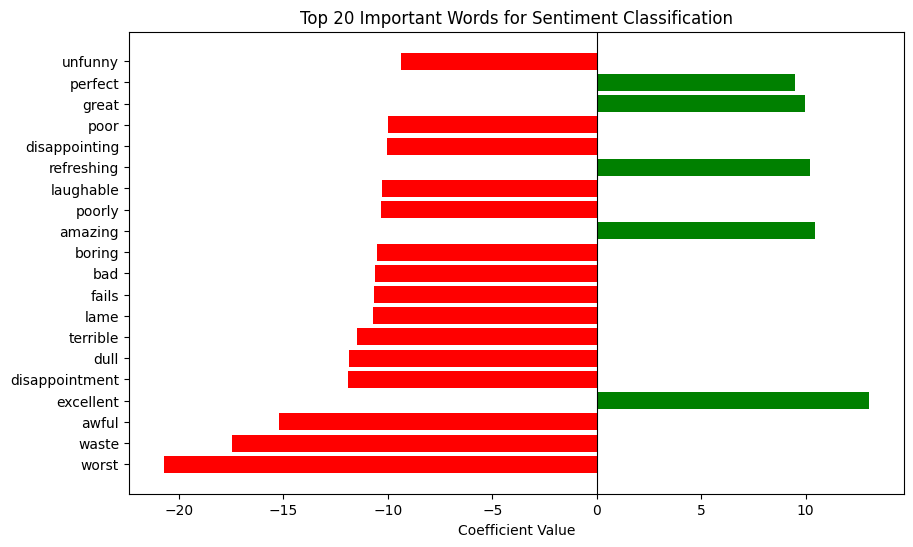

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Get the feature names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the coefficients from the logistic regression model
coefficients = clf.coef_[0]  #  binary classification

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute coefficient value and get the top 20 features
top_n = 20
top_important_features = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index).head(top_n)

# Plotting the top important features
plt.figure(figsize=(10, 6))
plt.barh(top_important_features['Feature'], top_important_features['Coefficient'], color=['green' if x > 0 else 'red' for x in top_important_features['Coefficient']])
plt.xlabel('Coefficient Value')
plt.title('Top 20 Important Words for Sentiment Classification')
plt.axvline(0, color='black', lw=0.8)  # Add a vertical line at 0
plt.show()
